# Метрики классификации. Преимущества и недостатки логистической регрессии

✍ Мы научились обучать модель логистической регрессии, чтобы решать с её помощью задачу классификации. Теперь мы познакомимся с метриками классификации, чтобы научиться оценивать качество модели.

Однако прежде чем мы перейдём к этим метрикам, нам очень важно освежить в памяти некоторую терминологию из статистики, а именно вспомнить, что такое ошибки I и II рода.

Примечание. Напомним, что с определением ошибок I и II рода мы знакомились в модуле «EDA-4. Статистические тесты».

## ОШИБКИ I И II РОДА С ТОЧКИ ЗРЕНИЯ КЛАССИФИКАЦИИ

Давайте рассмотрим предсказания алгоритма **yi^** на конкретном объекте **xi** под номером из данных **i** с точки зрения статистических гипотез.

Будем считать класс 1 (диабет есть) положительным исходом (Positive), а класс 0 (диабета нет) — отрицательным (Negative).

**Примечание**. На первый взгляд такая терминология может показаться не совсем этичной, так как наличие диабета — это всё-таки отрицательный сценарий для пациента. Однако для унификации терминологии в машинном обучении в большинстве задач объекты класса 1 считаются объектами с наличием некоторого эффекта (болезнь есть / задолженность погашена / клиент ушёл / устройство отказало и т. д.), а объекты класса 0 — объектами с отсутствием этого эффекта (болезни нет / задолженность не погашена / клиент не ушёл / устройство работает без отказов и т. д.).

Пусть у нас есть некоторый пациент **xi**, и мы хотим понять, болен ли он диабетом. С точки зрения задачи классификации мы хотим предсказать истинный класс **(yi)** пациента.

Нулевая гипотеза будет состоять в отсутствии эффекта (пациент не болен диабетом), то есть **yi = 0**, а альтернативная — в его наличии (пациент болен диабетом) , то есть **yi = 1**. В терминах статистических гипотез это будет записано так:

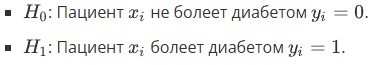

Тогда у нас есть два случая, в которых мы можем допустить ошибку:

- Ошибка I (первого) рода (**a-ошибка**): отклонение нулевой гипотезы, когда она на самом деле верна, или **ложноположительный результат**. То есть мы предсказали, что пациент болен диабетом, хотя это не так.

- Ошибка II (второго) рода (**a-ошибка**): принятие нулевой гипотезы, когда она на самом деле ложна, или **ложноотрицательный результат**. То есть мы предсказали, что пациент здоров, хотя на самом деле он болен диабетом.

**Примечание**. Как вы можете понять, в диагностических задачах для нас критичнее ошибка II рода. Последствия будут более серьёзными, если мы примем больного пациента за здорового, чем если мы примем здорового за больного. Нам важно охватить всех потенциально больных пациентов, чтобы сделать дополнительный анализ и удостовериться в результате.

Отлично, мы освежили в памяти ошибки I и II рода — это поможет нам понять суть метрик классификации. Давайте перейдём к ним.

## МЕТРИКИ КЛАССИФИКАЦИИ

Будем рассматривать метрики для задачи классификации на следующем примере.

Мы случайным образом выбрали десять пациентов из нашей таблицы и моделью *log_reg_full* предсказали для них ответы:

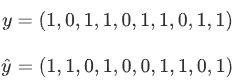

Все метрики, которые мы рассмотрим, основаны на **матрице ошибок**. С неё мы и начнём наш разбор.

1. **Матрица ошибок (confusion matrix)** показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта к одному из классов. Тогда каждая ячейка матрицы ошибок соответствует количеству объектов, попавших в одну из следующих четырёх категорий:

- Истинно положительные (True Positive, TP) — это объекты, обозначенные моделью как класс 1 (**y^ = 1**) и действительно принадлежащие к классу 1 (**y = 1**).

- Ложноположительные (False Positive, FP) — это объекты, обозначенные моделью как класс 1 **y^ = 1**(), но в действительности принадлежащие к классу 0 (**y = 0**). То есть это объекты, для которых модель совершила ошибку I рода.

- Истинно отрицательные (True Negative, TN) — это объекты, обозначенные моделью как класс 0 (**y^ = 0**) и действительно принадлежащие к классу 0 (**y = 0**).

- Ложноотрицательные (False Negative, FN) — это объекты, обозначенные моделью как класс 0 (**y^ = 1**), но в действительности принадлежащие к классу 1 (**y = 1**). То есть это объекты, для которых модель совершила ошибку II рода.

Общий вид матрицы ошибок будет следующим:

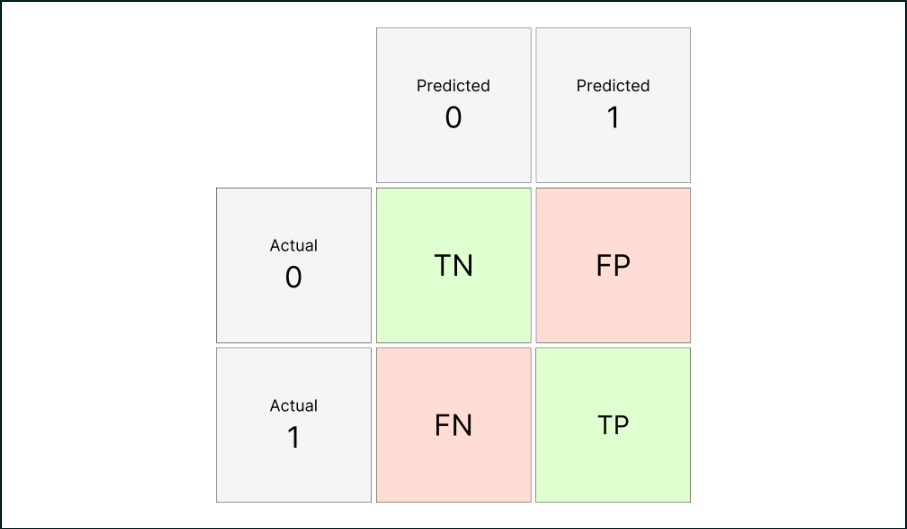

Давайте посмотрим, как будет выглядеть матрица ошибок для нашего примера предсказаний модели *log_reg_full*:

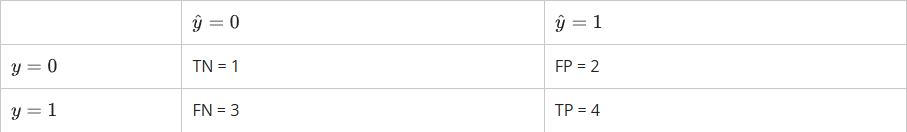

Для большей наглядности представим следующую ситуацию: у нас есть множество наблюдений двух классов (класс 1 — круги, класс 0 — квадраты). Пусть мы нарисовали некоторый круг и условились, что все объекты, лежащие в этом круге, мы будем считать классом 1, а объекты вне круга — классом 0. Тогда мы получим следующую картину:

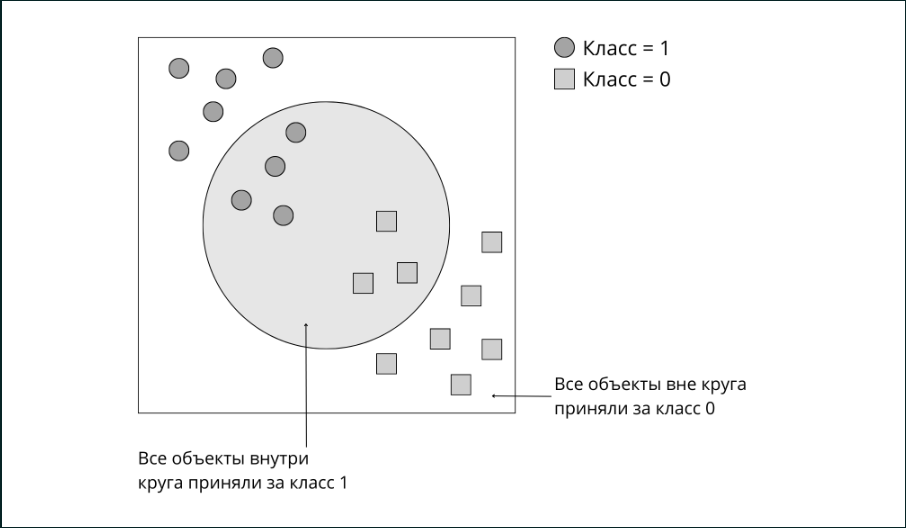

Таким образом, мы получили четыре группы объектов:

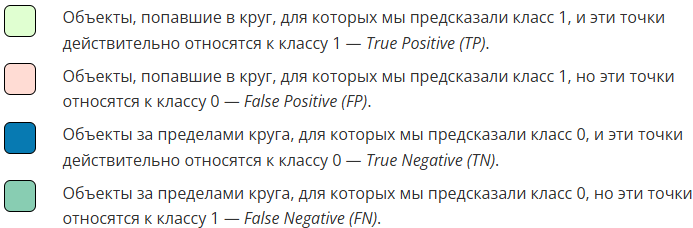

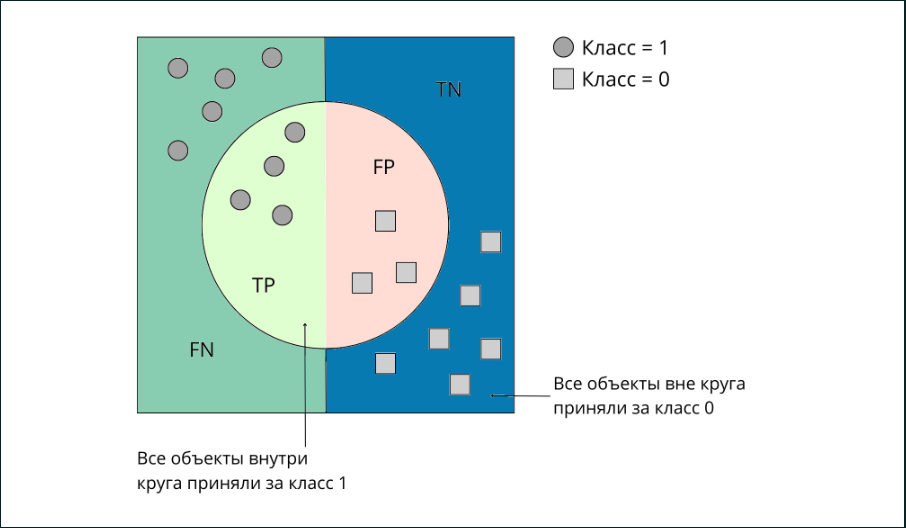

Формально матрица ошибок не является метрикой, но на её основе составляются сами метрики классификации. Давайте перейдём к ним.

2. 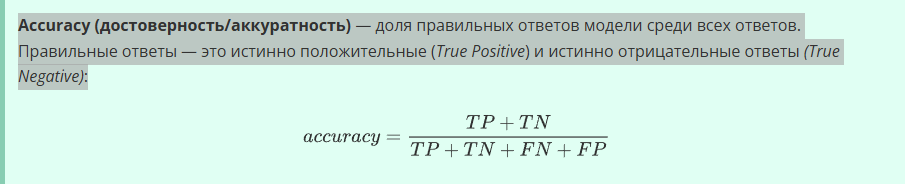

**Примечание**. Нередко в русской литературе вы можете встретить перевод метрики accuracy как «точность», однако так же на русский язык переводится метрика precision, о которой мы поговорим далее. Поэтому, если вы используете термин «точность», старайтесь указывать, о какой именно метрике (accuracy или precision) идёт речь.

В виде диаграммы соотношение количества объектов, классы которых мы угадали и общего количества объектов записывается в следующем виде:

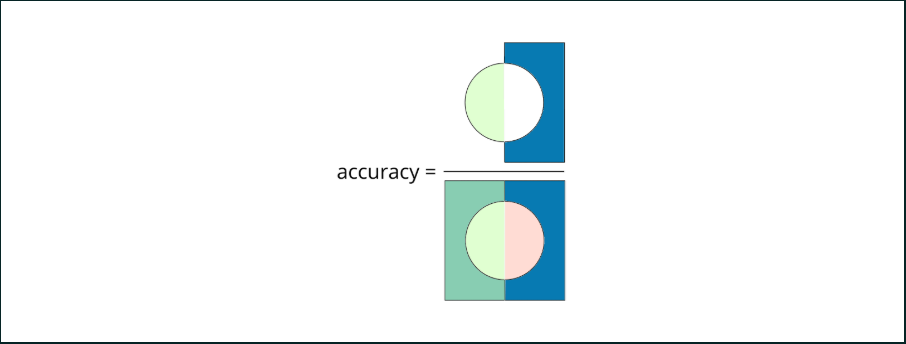

**Интерпретация**: как много (в долях) модель угадала ответов.

2
Accuracy (достоверность/аккуратность) — доля правильных ответов модели среди всех ответов. Правильные ответы — это истинно положительные (True Positive) и истинно отрицательные ответы (True Negative):


Примечание. Нередко в русской литературе вы можете встретить перевод метрики accuracy как «точность», однако так же на русский язык переводится метрика precision, о которой мы поговорим далее. Поэтому, если вы используете термин «точность», старайтесь указывать, о какой именно метрике (accuracy или precision) идёт речь.

В виде диаграммы соотношение количества объектов, классы которых мы угадали и общего количества объектов записывается в следующем виде:

img

Интерпретация: как много (в долях) модель угадала ответов.

Метрика изменяется в диапазоне от 0 до 1. Чем ближе значение к 1, тем больше ответов модель «угадала». 

Рассчитаем accuracy для нашего примера:

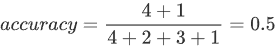

Итак, наша accuracy равна 0.5, то есть модель сделала верное предсказание для 50 % пациентов из выборки.

*Accuracy* — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. Она бесполезна, если классы сильно несбалансированы. Продемонстрируем это следующим примером.

Допустим, мы хотим оценить работу спам-фильтра электронной почты. Спам-письма обозначены как Positive (1), а не спам — как *Negative (0)*.

У нас есть 110 писем. Из них:

- 100 писем — не спам,
- 10 писем — спам.

Мы построили некоторый классификатор. Согласно результатам классификатора, из 100 писем класса «не спам» мы верно определили (отнесли к классу 0) 90, а оставшиеся 10 отнесли к классу «спам» (классу 1). То есть True Negative = 90, а False Positive = 10. Из 10 спам-писем мы верно определили 5 (отнесли к классу 1), а остальные 5 отнесли к классу «не спам» (классу 0). То есть True Positive = 5, а False Negative = 5.

Матрица ошибок будет иметь вид:

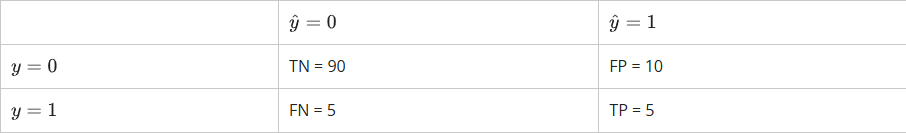

Тогда *accuracy*:

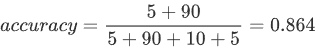

2
Accuracy (достоверность/аккуратность) — доля правильных ответов модели среди всех ответов. Правильные ответы — это истинно положительные (True Positive) и истинно отрицательные ответы (True Negative):


Примечание. Нередко в русской литературе вы можете встретить перевод метрики accuracy как «точность», однако так же на русский язык переводится метрика precision, о которой мы поговорим далее. Поэтому, если вы используете термин «точность», старайтесь указывать, о какой именно метрике (accuracy или precision) идёт речь.

В виде диаграммы соотношение количества объектов, классы которых мы угадали и общего количества объектов записывается в следующем виде:

img

Интерпретация: как много (в долях) модель угадала ответов.

Метрика изменяется в диапазоне от 0 до 1. Чем ближе значение к 1, тем больше ответов модель «угадала». 

Рассчитаем accuracy для нашего примера:


Итак, наша accuracy равна 0.5, то есть модель сделала верное предсказание для 50 % пациентов из выборки.

Accuracy — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. Она бесполезна, если классы сильно несбалансированы. Продемонстрируем это следующим примером.

Допустим, мы хотим оценить работу спам-фильтра электронной почты. Спам-письма обозначены как Positive (1), а не спам — как Negative (0).

У нас есть 110 писем. Из них:

100 писем — не спам,
10 писем — спам.
Мы построили некоторый классификатор. Согласно результатам классификатора, из 100 писем класса «не спам» мы верно определили (отнесли к классу 0) 90, а оставшиеся 10 отнесли к классу «спам» (классу 1). То есть True Negative = 90, а False Positive = 10. Из 10 спам-писем мы верно определили 5 (отнесли к классу 1), а остальные 5 отнесли к классу «не спам» (классу 0). То есть True Positive = 5, а False Negative = 5.

Матрица ошибок будет иметь вид:

TN = 90	FP = 10
FN = 5	TP = 5
Тогда accuracy:


Однако представим, что мы построили классификатор, который просто предсказывает все письма как «не спам», то есть *True Negative = 100*, *False Negative = 10*, *True Positive = 0*, False Positive = 0.

Матрица ошибок будет иметь вид:

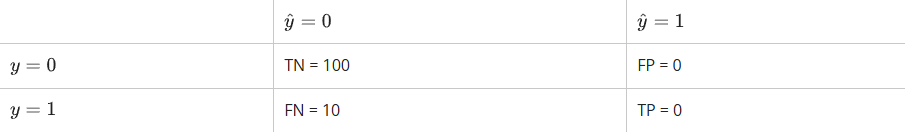

Тогда accuracy будет равна:

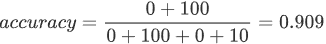

Метрика выросла, однако наша «модель» не обладает никакой предсказательной силой, так как изначально мы хотели определять письма со спамом. Преодолеть это нам поможет переход с общей для всех классов метрики к отдельным показателям качества классов, а именно к метрикам **precision**, **recall** и **F-мера.**

3. 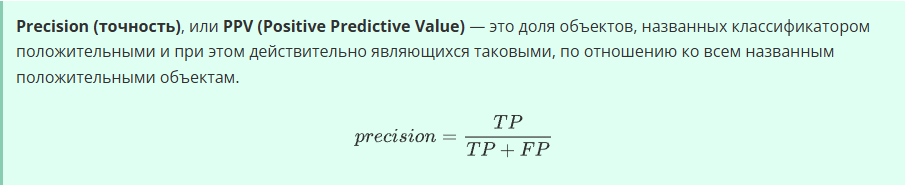

В виде диаграммы соотношение количества объектов класса 1, которые мы угадали и количества объектов, которые мы приняли за класс 1, записывается следующим образом:

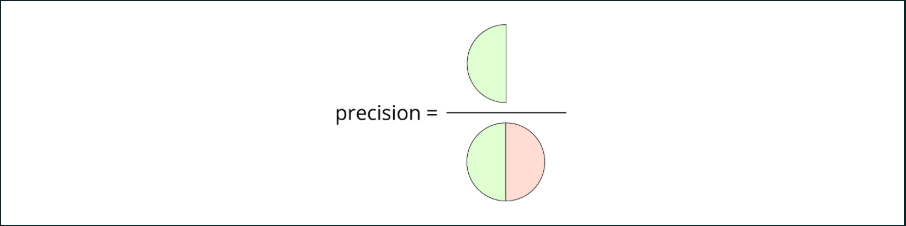

Метрика также изменяется от 0 до 1. 

**Интерпретация**: способность отделить класс 1 от класса 0. Чем больше precision, тем меньше ложных попаданий. **То есть чем ближе precision к 1, тем меньше вероятность модели допустить ошибку I рода**.

Именно *precision* не позволяет записать все ответы в один класс, так как в таком случае резко возрастает значение *False Positive* и метрика снижается.

Рассчитаем *precision* для нашего примера:

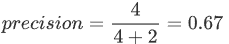

Таким образом, количество названных моделью больных диабетом и при этом действительно являющихся больными составляет 67 % от всех пациентов.

Precision нужен в задачах, где от нас требуется минимум ложных срабатываний. Чем выше «цена» ложноположительного результата, тем выше должен быть *precision*.

Например, по камерам видеонаблюдения мы автоматически выявляем признаки драки на улицах и отправляем наряд полиции для урегулирования конфликта. Однако штат сотрудников сильно ограничен, реагировать на любой признак конфликта мы не можем, поэтому мы хотим уменьшить количество ложных вызовов. В такой ситуации мы выберем такую модель, у которой наибольший *precision*.

В предельном случае (когда precision равен 1) у модели отсутствуют ложноположительные срабатывания.

**Примечание**. Важно понимать, что данный вывод справедлив только для выборки, на которой мы оцениваем метрику, то есть это не означает, что модель вовсе не может допустить ложноположительных результатов. Однако чем больше выборка, на которой мы тестируем алгоритм, тем ближе к истине будет данный вывод.

4. 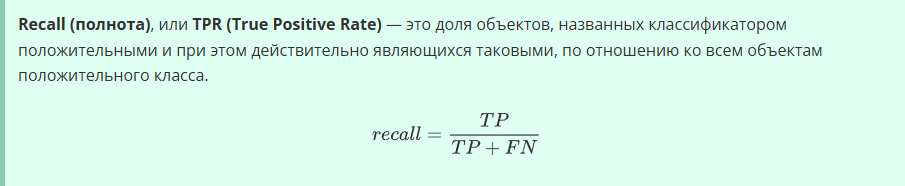

Диаграмма:

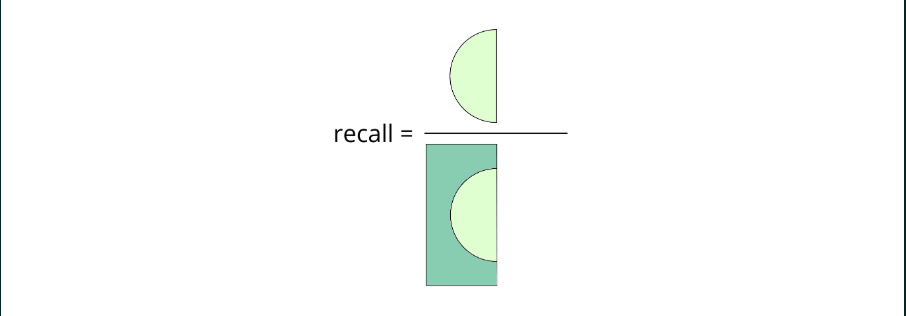

Метрика изменяется от 0 до 1.

**Интерпретация**: способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что метрика зависит от количества ложноотрицательных срабатываний. **То есть чем ближе recall к 1, тем меньше вероятность модели допустить ошибку II рода**.

Рассчитаем *recall* для нашего примера:

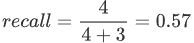

Итак, процент пациентов, которых модель определила к классу больных диабетом, среди всех действительно больных диабетом составляет 57 %.

*Recall* очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1.

Например, это различные задачи, в которых мы пытаемся определить наличие эффекта, который может привести к серьёзным последствиям. Это могут быть те же диагностические задачи или задачи, в которых мы прогнозируем вероятность отказа устройства, от работы которого зависят человеческие жизни.

Предельный случай (когда recall равен 1) означает, что модель нашла все объекты класса 1, например всех действительно больных пациентов. Однако метрика ничего не скажет о том, с какой точностью мы это сделали.

**Примечание**. Важно понимать, что данный вывод справедлив только для выборки, на которой мы оцениваем метрику, то есть это не означает, что модель вовсе не может допустить ложноотрицательных исходов. Однако чем больше выборка, на которой мы тестируем алгоритм, тем данный вывод будет ближе к истине.

Метрики *precision* и *recall* не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что **увеличение одной из метрик может привести к уменьшению другой**.

Концентрация только на одной метрике (*precision или recall*) без учёта второй — сомнительная идея.

В битве за максимум *precision* для класса 1 побеждает модель, которая всегда будет говорить «нет». У неё вообще не будет ложноположительных срабатываний.

В битве за максимум *recall* для класса 1 побеждает модель, которая всегда будет говорить «да». Она охватит все наблюдения класса 1, и у неё не будет ложноотрицательных срабатываний. 

В реальности необходимо балансировать между двумя этими метриками.

Классическим примером является задача определения оттока клиентов.

Очевидно, что мы хотим найти как можно больше клиентов, которые потенциально могут уйти от нас. Чтобы повысить их лояльность, мы планируем использовать ресурсы колл-центра. Однако они ограничены и мы не можем звонить всем клиентам. Определив стратегию и ресурс для удержания клиентов, мы можем подобрать нужные пороги по precision и recall. Например, можно сосредоточиться на удержании только высокодоходных клиентов или тех, кто уйдёт с большей вероятностью.

5. В таком случае нам подойдёт следующая метрика.

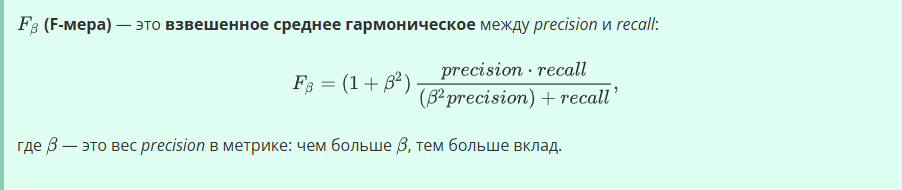

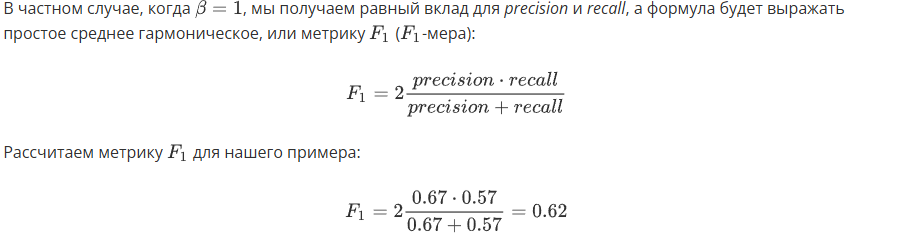

В чём преимущество **F-меры**?

Метрика равна своему максимуму (1), если и precision, и *recall* равны 1 (то есть когда отсутствуют как ложноположительные, так и ложноотрицательные срабатывания). Но если хотя бы одна из метрик будет близка к 0, то и **F1** будет близка к 0. 

Несмотря на отсутствие бизнес-интерпретации, метрика **F1** является довольно распространённой и используется в задачах, где необходимо выбрать модель, которая балансирует между *precision* и *recall*.

Например, если цена дополнительной диагностики заболевания очень высока, то есть ложных срабатываний должно быть минимум, но при этом нам важно охватить как можно больше больных пациентов. 

**Примечание**. Ещё одно небольшое, но очень важное замечание: все суждения, которые мы привели по отношению к **precision**, **recall** и **F-мере**, относятся только к классу 1, так как эти метрики по умолчанию считаются для класса 1. Для решения большинства задач знания о значении этих метрик для класса 1 более чем достаточно, так как обычно нас интересует именно наличие некоторого эффекта.

Однако если вам по каким-то причинам необходимо рассчитать **precision**, **recall** и **F-меру** для класса 0, для этого достаточно сделать перекодировку классов — поменять их обозначения местами или (при расчёте метрик с помощью библиотеки sklearn) изменить значение специального параметра *pos_label* на 0.


### Давайте обобщим всё вышесказанное в виде таблицы:

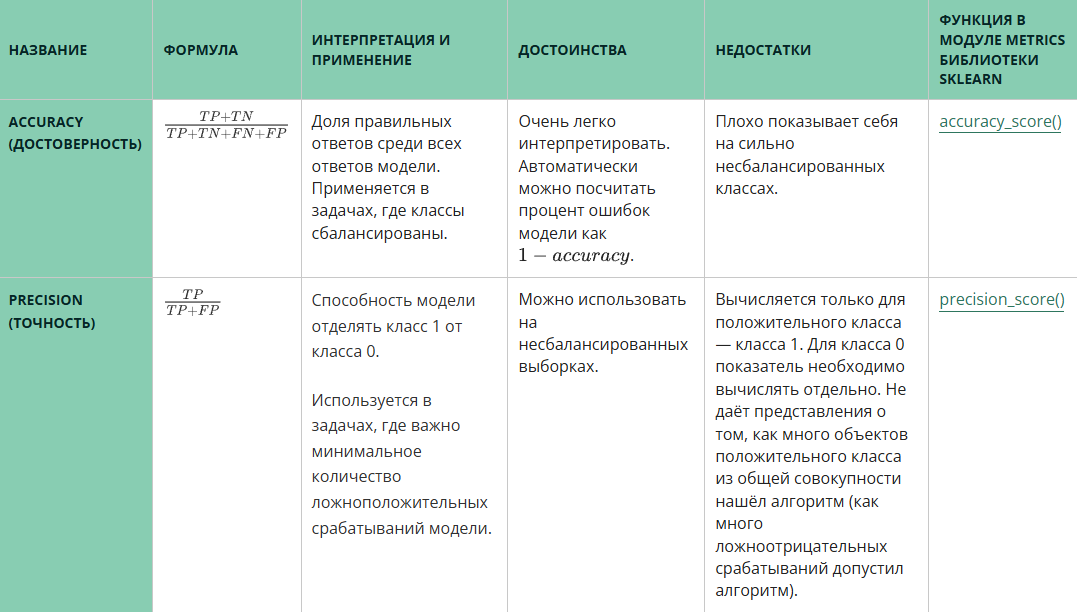
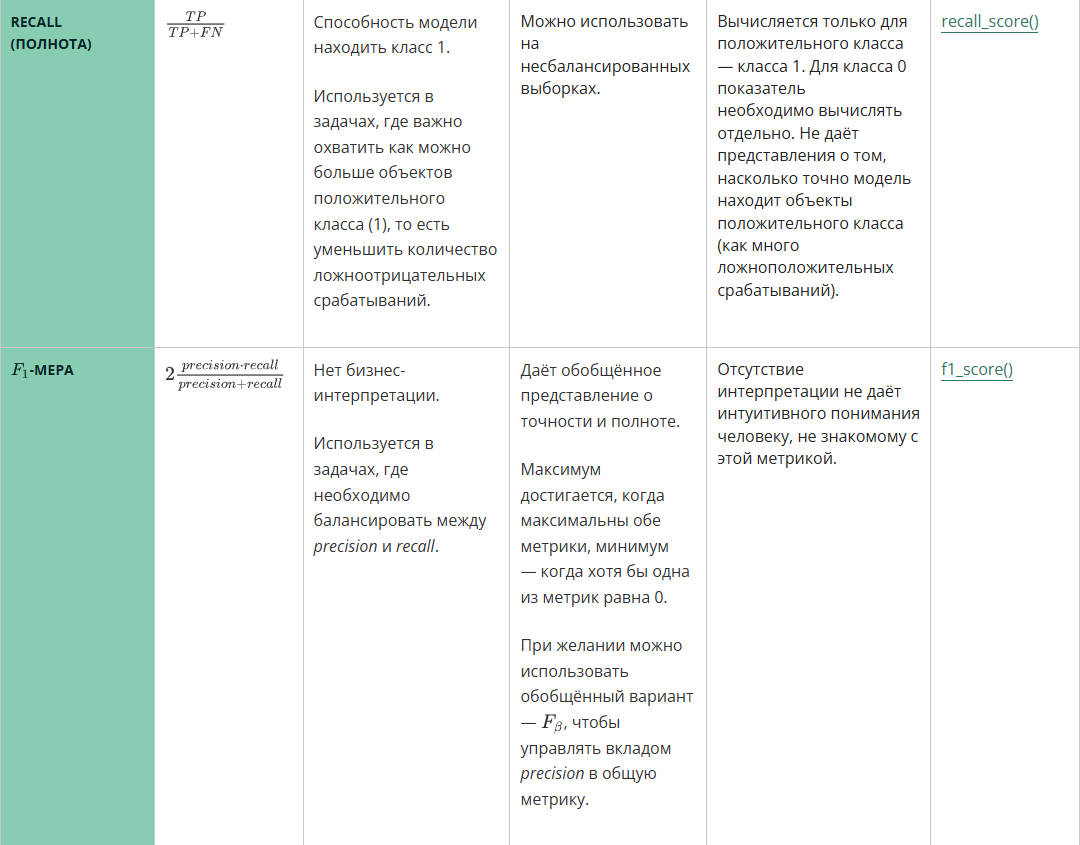

### Задание 3.1

Вы создали классификатор, который разделяет экономические и политические новости на два разных Telegram-канала, и хотите проверить его качество. За день вышло 15 политических новостей и 20 экономических.

Ваш алгоритм из 15 политических новостей отметил 9 как экономические, а из 20 экономических 6 — как политические.

Найдите метрику accuracy. Ответ округлите до сотых.

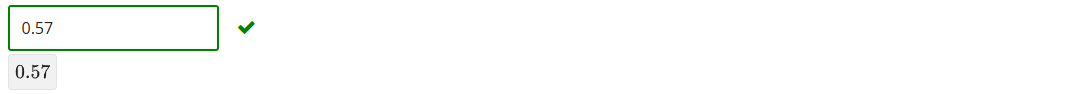

### Задание 3.2

В чём состоит проблема метрики accuracy в задаче классификации?

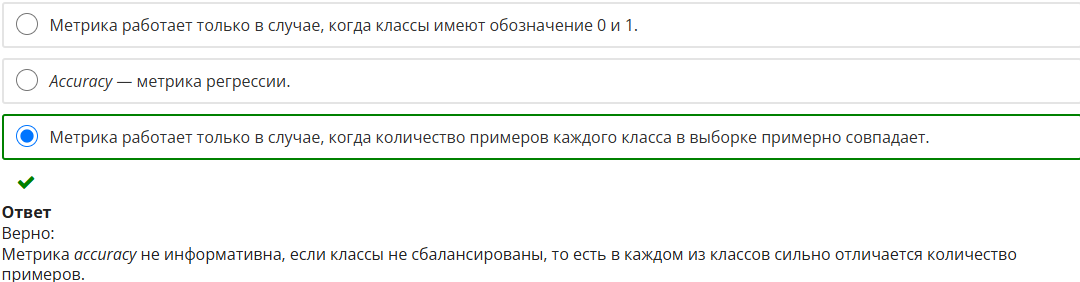

### Задание 3.3

Условимся, что объекты класса 1 будут называться положительными.

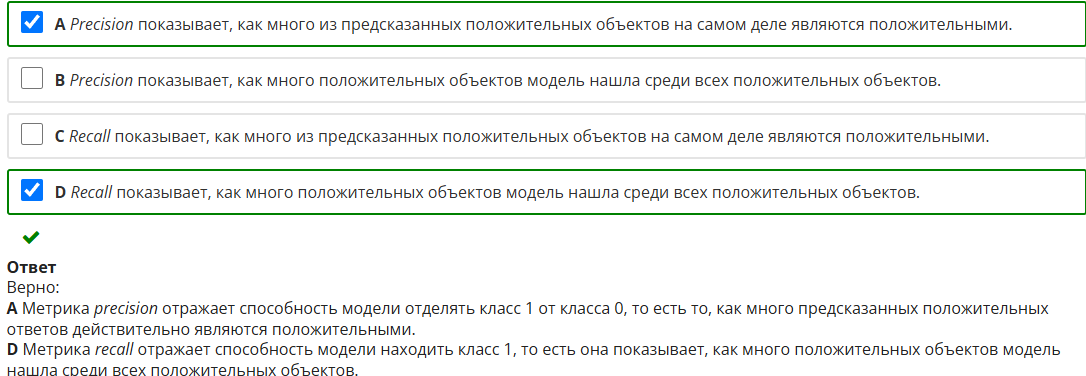

### Задание 3.4

Пусть мы по снимкам с беспилотника хотим классифицировать растения на больные (класс 1) и здоровые (класс 0). Считается, что болезнь растений является незаразной, а химикаты убивают здоровые растения.

Для решения задачи были обучены две модели. Их метрики для класса 1 составили:

- Для первой модели: precision = 0.78, recall = 0.51.
- Для второй модели: precision = 0.61, recall = 0.81.

Нам необходимо сохранить как можно больший урожай.

Какую модель выберем?

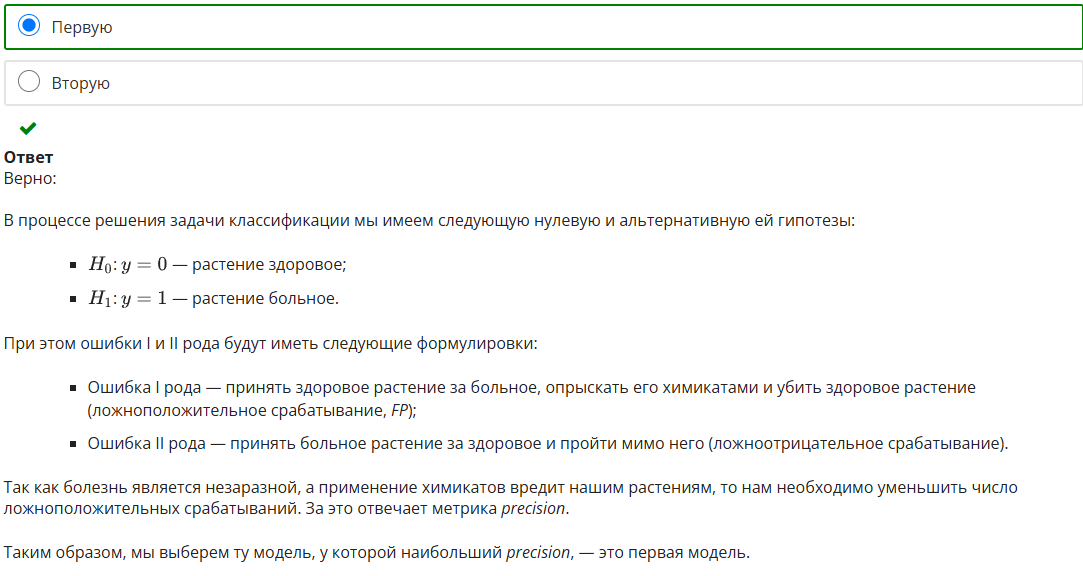

### Задание 3.5

Болезнь наших растений оказалась заразной, причём одно больное растение заражает 4 здоровых. По нашим расчётам, выгоднее оказывается лишний раз опрыскать растение химикатами, чем допустить прогрессирование болезни.

Какую модель мы будем использовать в таком случае?

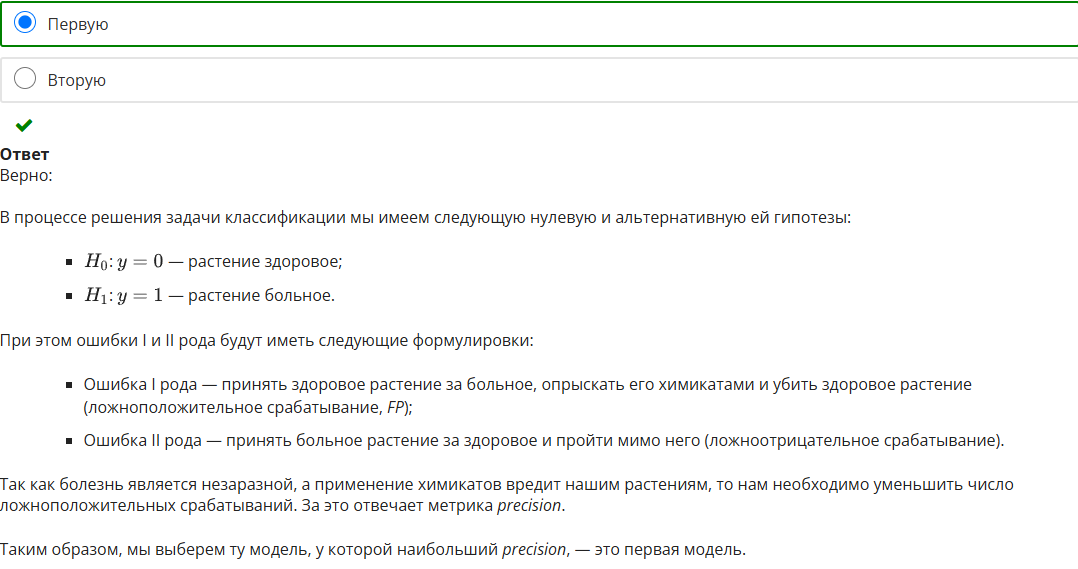